In [1]:
!pip install pandas matplotlib seaborn nltk



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import nltk

# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load the dataset
data = pd.read_csv('C:\\Users\\User\\Desktop\\softdrv\\archive\\depre.csv')  # Change path to actual file path

# Display the first few rows
print("First few rows of the dataset:")
display(data.head())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Data Types
print("\nData Types:")
print(data.dtypes)

# Unique values in target variable (if there's a sentiment label)
print("\nUnique values in sentiment column:")
print(data['status'].unique())  # Replace 'sentiment' with the name of the target column


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


First few rows of the dataset:


,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety



Missing values in each column:
Unnamed: 0      0
statement     362
status          0
dtype: int64

Data Types:
Unnamed: 0     int64
statement     object
status        object
dtype: object

Unique values in sentiment column:
['Anxiety' 'Normal' 'Depression' 'Suicidal' 'Stress' 'Bipolar'
 'Personality disorder']


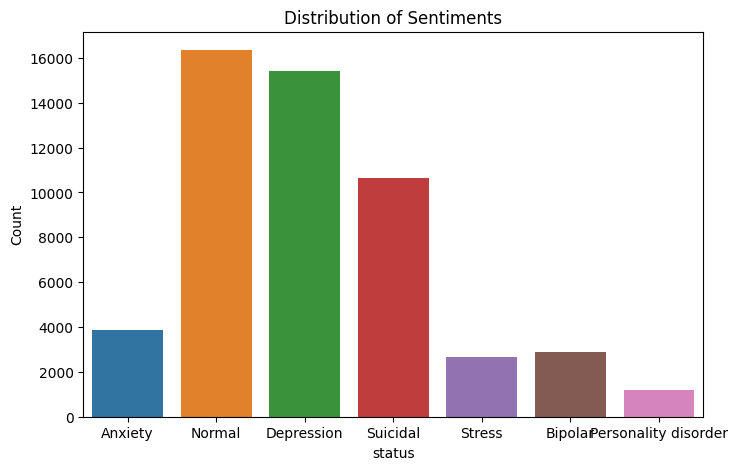

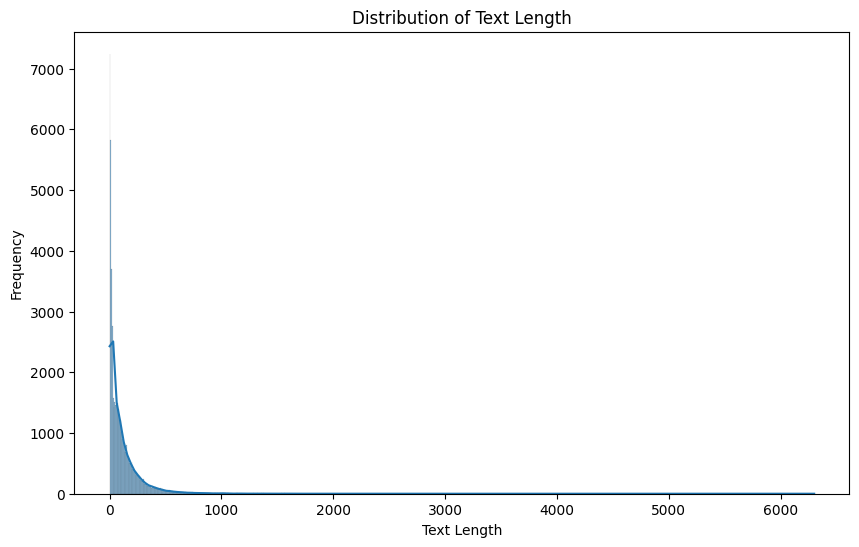

In [12]:
# Sentiment class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='status', data=data)  # Adjust 'sentiment' to the actual column name for sentiment
plt.title('Distribution of Sentiments')
plt.xlabel('status')
plt.ylabel('Count')
plt.show()

# Length of text distribution
data['statement'] = data['statement'].fillna('').astype(str)

# Compute text length
data['text_length'] = data['statement'].apply(lambda x: len(x.split()))

# Visualize text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Define preprocessing function
def preprocess_text(statement):
    # Ensure the input is a string
    if not isinstance(statement, str):
        statement = ''  # Handle non-string or NaN values
    # Convert to lowercase
    statement = statement.lower()
    # Remove punctuation and special characters
    statement = re.sub(r'[^a-zA-Z\s]', '', statement)
    # Tokenize words
    words = word_tokenize(statement)
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Apply preprocessing to the 'statement' column
data['statement'] = data['statement'].fillna('').astype(str)  # Ensure all values are strings
data['processed_text'] = data['statement'].apply(preprocess_text)

# Display preprocessed data
print("Preprocessed text data:")
display(data[['statement', 'processed_text']].head())


Preprocessed text data:


,statement,processed_text
0,oh my gosh,oh gosh
1,"trouble sleeping, confused mind, restless hear...",trouble sleeping confused mind restless heart ...
2,"All wrong, back off dear, forward doubt. Stay ...",wrong back dear forward doubt stay restless re...
3,I've shifted my focus to something else but I'...,ive shifted focus something else im still worried
4,"I'm restless and restless, it's been a month n...",im restless restless month boy mean


In [18]:
pip install wordcloud


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
from collections import Counter

words = ' '.join(data['processed_text']).split()
word_freq = Counter(words).most_common(20)
print("Most Common Words:")
print(word_freq)


Most Common Words:
[('like', 38566), ('feel', 35627), ('want', 28716), ('know', 24435), ('get', 23256), ('life', 23228), ('im', 21649), ('time', 21255), ('even', 18713), ('people', 16884), ('would', 16798), ('year', 16571), ('day', 16490), ('really', 16372), ('thing', 16287), ('one', 15537), ('going', 13850), ('think', 13684), ('go', 13609), ('friend', 13221)]


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['processed_text']).toarray()


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['processed_text']).toarray()


In [30]:
from sklearn.model_selection import train_test_split

# Define target and features
y = data['status']  # Replace 'sentiment' with the actual target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train and test split done:")
print(f"Train size: {len(X_train)}")
print(f"Test size: {len(X_test)}")


Train and test split done:
Train size: 42434
Test size: 10609


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.760486379489113
Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.82      0.77      0.79       779
             Bipolar       0.87      0.69      0.77       580
          Depression       0.71      0.73      0.72      3100
              Normal       0.83      0.96      0.89      3327
Personality disorder       0.85      0.42      0.57       248
              Stress       0.73      0.45      0.56       557
            Suicidal       0.67      0.63      0.65      2018

            accuracy                           0.76     10609
           macro avg       0.78      0.66      0.71     10609
        weighted avg       0.76      0.76      0.75     10609



In [32]:
pip install tensorflow pandas numpy scikit-learn nltk



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
# Import libraries
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Check column names
print(data.columns)

# Rename columns if necessary
# Example: If the dataset has 'statement' as text column and 'label' as target column
text_column = 'statement'  # Replace with your text column name
label_column = 'status'     # Replace with your sentiment column name

# Preprocess text data
def preprocess_text(text):
    if not isinstance(text, str):  # Handle non-string data
        text = ''
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and numbers
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(words)

data['processed_text'] = data[text_column].apply(preprocess_text)

# Encode labels
le = LabelEncoder()
data['encoded_label'] = le.fit_transform(data[label_column])  # Encode labels as integers
num_classes = len(data['encoded_label'].unique())

# Split data
X = data['processed_text']
y = to_categorical(data['encoded_label'], num_classes=num_classes)  # Convert to one-hot encoding

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 5000  # Vocabulary size
max_len = 100     # Maximum sequence length

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Build LSTM Model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    LSTM(32),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

# Train the model
history = model.fit(X_train_pad, y_train, validation_data=(X_test_pad, y_test),
                    epochs=5, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Index(['Unnamed: 0', 'statement', 'status', 'text_length', 'processed_text'], dtype='object')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          640000    
                                                                 
 bidirectional (Bidirection  (None, 100, 128)          98816     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                20608     
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)      